In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Patch
from matplotlib.patches import Polygon
from IPython.display import Image, display
from matplotlib.patches import Arc

visualdir = "visualcache"

# 2ª Lei de Kepler

> "A reta que liga um planeta ao Sol varre áreas iguais no plano da órbita em intervalos de tempos iguais, ou seja, a tara de variação $\frac{dA}{dt}$ é constante.", HALLIDAY, D.; RESNICK, R. *Fundamentos de Física – Volume 2*. 9ª ed. Rio de Janeiro: LTC, 2011. p. 41.

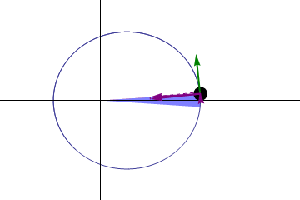

In [56]:
display(Image(filename=f"{visualdir}/leidasareas.gif"))

Então temos uma lei que diz que a proporção $\frac{\Delta A}{\Delta t} = cte$, ou, quando $\Delta t \to 0$, temos $\frac{dA}{dt} = cte$, e isso nos permite aproximar $\frac{dA}{dt}$ como um triângulos, pois quanto menor a fração do segmento de arco mais ele se aproxima de uma reta.

/tmp/ipykernel_36793/2560884256.py:33: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


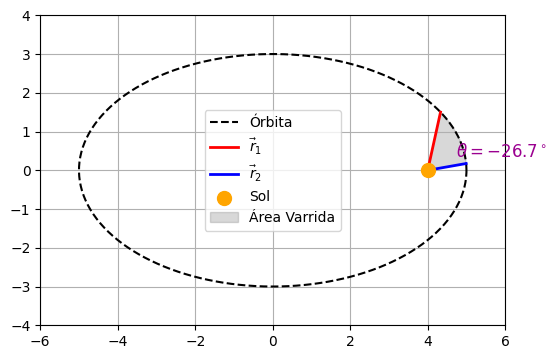

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon

# Parâmetros da elipse
a = 5  # Semi-eixo maior
b = 3  # Semi-eixo menor
c = np.sqrt(a**2 - b**2)  # Distância focal
foco = (c, 0)  # Posição do foco

# Ângulos iniciais
theta1 = np.radians(30)  # Ângulo fixo do primeiro vetor
theta2_max = np.radians(100)  # Ângulo inicial do segundo vetor
frames = 30  # Número de quadros na animação

# Criar figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-a-1, a+1)
ax.set_ylim(-b-1, b+1)
ax.set_aspect('equal')

# Criar os elementos gráficos (inicialmente vazios)
elipse, = ax.plot([], [], 'black', linestyle='--', label="Órbita")
r1_line, = ax.plot([], [], 'r', lw=2, label=r'$\vec{r}_1$')
r2_line, = ax.plot([], [], 'b', lw=2, label=r'$\vec{r}_2$')
theta_text = ax.text(0, 0, '', fontsize=12, color='#9b0090', ha='center', label=r"$\theta$")
area_patch = Polygon([[0, 0]], closed=True, color='gray', alpha=0.3, label='Área Varrida')
ax.scatter(foco[0], foco[1], color='orange', s=100, label='Sol', zorder=5)
ax.add_patch(area_patch)

plt.grid()
ax.legend()



# Função de inicialização
def init():
    t = np.linspace(0, 2*np.pi, 300)
    elipse.set_data(a * np.cos(t), b * np.sin(t))
    return elipse, r1_line, r2_line, area_patch, theta_text

# Função de atualização da animação
def update(frame):
    theta2 = theta2_max * (1 - frame / frames)  # Theta2 diminuindo até 30°
    
    # Coordenadas dos pontos na elipse
    x1, y1 = a * np.cos(theta1), b * np.sin(theta1)
    x2, y2 = a * np.cos(theta2), b * np.sin(theta2)

    # Atualizar os vetores r1 e r2
    r1_line.set_data([foco[0], x1], [foco[1], y1])
    r2_line.set_data([foco[0], x2], [foco[1], y2])

    # Criar o setor preenchido
    t_fill = np.linspace(theta1, theta2, 30)
    x_fill = a * np.cos(t_fill)
    y_fill = b * np.sin(t_fill)
    vertices = np.column_stack(([foco[0]] + list(x_fill) + [foco[0]], 
                                [foco[1]] + list(y_fill) + [foco[1]]))
    area_patch.set_xy(vertices)

    # Atualizar o texto do ângulo θ
    theta_deg = np.degrees(theta2 - theta1)
    theta_mid = (theta1 + theta2) / 2
    x_theta = foco[0] + (a * 0.4) * np.cos(theta_mid)
    y_theta = foco[1] + (b * 0.4) * np.sin(theta_mid)
    theta_text.set_position((x_theta, y_theta))
    theta_text.set_text(r'$\theta = %.1f^\circ$' % theta_deg)

    # Adicionar ponto laranja no foco da elipse
    # ax.scatter(foco[0], foco[1], color='orange', s=100, label='Sol', zorder=5)


    return r1_line, r2_line, area_patch, theta_text

# Criar animação
ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=False)

# Salvar como GIF (opcional)
ani.save(f"{visualdir}/kepler_theta.gif", writer="pillow", fps=10)

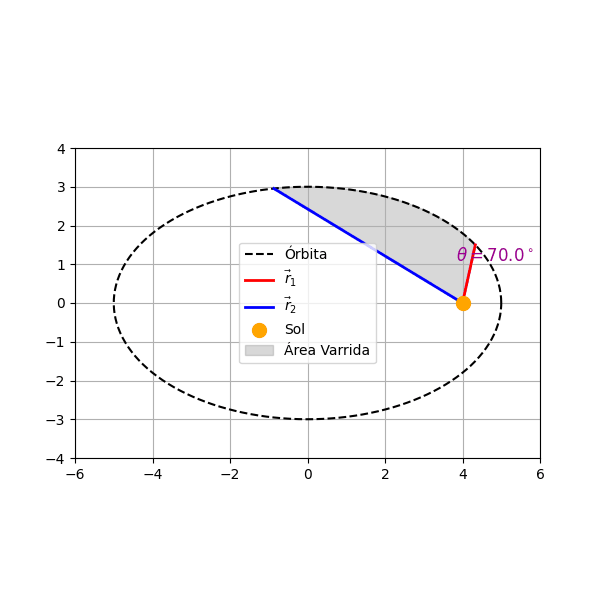

In [58]:
display(Image(filename=f"{visualdir}/kepler_theta.gif"))

E conforme $\theta$ se aproxima de 0 o segmento de arco entre $\vec r_1$ e $\vec r_2$ se aproxima de uma reta, então a área se aproxima da área do triângulo formado por $\vec r_1$, $\vec r_2$ e $\vec v dt$ ($\vec v dt$ o vetor tragetória percorrida pelo planeta), ou seja: 

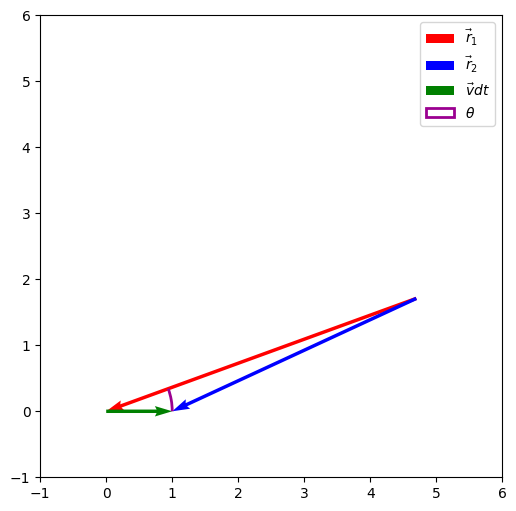

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Parâmetros do triângulo
r1 = 5   # Comprimento dos lados iguais
vdt = 1  # Base muito menor
theta = np.radians(20)  # Ângulo entre r1 e vdt (em radianos)

# Coordenadas dos pontos do triângulo
A = (0, 0)  # Origem
B = (vdt, 0)  # Base do triângulo
C = (r1 * np.cos(theta), r1 * np.sin(theta))  # Ponto superior do triângulo

# Criar figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, r1 + 1)
ax.set_ylim(-1, r1 + 1)
ax.set_aspect('equal')

# Desenhar os lados como setas invertidas
ax.quiver(C[0], C[1], A[0] - C[0], A[1] - C[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\vec{r}_1$')
ax.quiver(C[0], C[1], B[0] - C[0], B[1] - C[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\vec{r}_2$')
ax.quiver(A[0], A[1], B[0] - A[0], B[1] - A[1], angles='xy', scale_units='xy', scale=1, color='g', label=r'$\vec vdt$')

# Destacar o ângulo theta com um arco
arc = Arc(A, 2, 2, angle=0, theta1=0, theta2=np.degrees(theta), color='#9b0090', lw=2, label=r'$\theta$' )
ax.add_patch(arc)

# Adicionar legendas e exibir o gráfico
ax.legend()
#plt.grid()
plt.show()


$$dA = \frac{1}{2} |\vec r_1 \times (\vec v dt)| = \frac{1}{2} |\vec r_1| \cdot |\vec v dt| \cdot \sin\theta $$

Sendo $\theta$ o ângulo entre $\vec r_1$ e $\vec v dt$.

$$\frac{dA}{dt} = \frac{1}{2} |\vec r_1| \cdot |\vec v| \cdot \sin\theta = \frac{1}{2} |\vec r_1 \times \vec v| $$

Outra definição importante nesta demonstração é a de momento angular $\vec l$

$$\vec l = \vec r \times \vec p $$

Sendo $\vec p$ o momento de inércia $\vec p = m \cdot \vec v$

$$\vec l = \vec r \times \vec p = m (\vec r \times \vec v)$$

$$\frac{d\vec l}{dt} = m (\vec v \times \vec v) + m (\vec r \times \vec a)$$


$$m (\vec v \times \vec v) = m \cdot |\vec v| \cdot |\vec v| \cdot \sin (0) =  m \cdot |\vec v| \cdot |\vec v| \cdot 0 = 0$$

$$\frac{d\vec l}{dt} = m (\vec r \times \vec a) = \vec r \times m\vec a = \vec r \times \vec F$$

Neste nosso cenário em que a interação é somente entre um planeta e uma estrela todas as forças envolvidas são paralelas ao vetor posição $\vec r$, portanto:

$$\frac{d\vec l}{dt} = |\vec r| \cdot |\vec F| \cdot \sin (0) = |\vec r| \cdot |\vec F| \cdot 0 =  0$$

Ou seja, não há variação no momento angular e $$\vec l = m (\vec r \times \vec v) = cte$$

$$\frac{\vec l}{m} = (\vec r \times \vec v) = cte$$

substituindo na velocidade areolar:

$$\frac{dA}{dt} = \frac{1}{2} \frac{\vec l}{m} = cte \cdot cte = cte$$

$$\int^{t_2}_{t_1} \frac{dA}{dt} dt= \int^{t_2}_{t_1} \frac{1}{2} \frac{\vec l}{m}dt$$

$$A= \frac{1}{2} \frac{\vec l}{m} \Delta t$$

$$A = cte \Delta t$$

Dessa forma podemos ver que a área varrida depende excluisvamente de uma contante e do tempo, mas não da posição do planeta o que quer dizer também que se $\Delta t_1 = \Delta t_2 \Rightarrow A_1 = A_2$